In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [6]:
df = pd.read_csv("../datasets/PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
transfer_fraud = df[(df["isFraud"]==1) & (df["type"]=="TRANSFER")]
transfer_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0


<AxesSubplot:xlabel='step', ylabel='amount'>

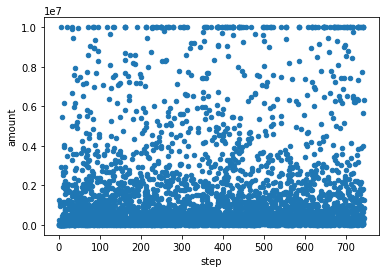

In [10]:
transfer_fraud.plot.scatter(x="step", y="amount")

In [11]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [12]:
# shows the number of fraudulent transactions made under type PAYMENT
df[df["type"]=="PAYMENT"]["isFraud"].value_counts()

0    2151495
Name: isFraud, dtype: int64

In [13]:
# shows the number of fraudulent transactions in the CASH_OUT type transactions
df[df["type"]=="CASH_OUT"]["isFraud"].value_counts() 

0    2233384
1       4116
Name: isFraud, dtype: int64

In [14]:
# shows the number of fraudulent transactions in the TRANSFER type transactions
df[df["type"]=="TRANSFER"]["isFraud"].value_counts() 

0    528812
1      4097
Name: isFraud, dtype: int64

In [15]:
# shows the number of fraudulent transactions in the DEBIT type transactions
df[df["type"]=="DEBIT"]["isFraud"].value_counts() 

0    41432
Name: isFraud, dtype: int64

In [16]:
# shows the number of fraudulent transactions in the CASH_IN type transactions
df[df["type"]=="CASH_IN"]["isFraud"].value_counts() 

0    1399284
Name: isFraud, dtype: int64

## Transfers dataframe analysis

In [17]:
transfer_df = df[df["type"]=="TRANSFER"]
transfer_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0


<AxesSubplot:xlabel='step', ylabel='amount'>

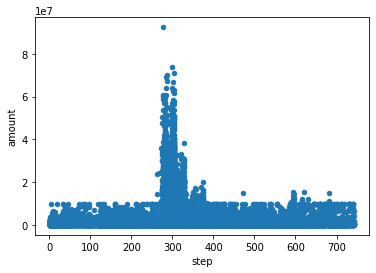

In [18]:
transfer_df.plot.scatter(x="step", y="amount")

In [19]:
first_step = transfer_df[(transfer_df["step"] > 295)]
first_step[(first_step["isFraud"]==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3960324,296,TRANSFER,40593.23,C1712808449,40593.23,0.00,C1997838913,0.0,0.0,1,0
3960326,296,TRANSFER,890964.06,C1313129154,890964.06,0.00,C42915246,0.0,0.0,1,0
3960328,296,TRANSFER,10000000.00,C1734365365,15591414.49,5591414.49,C1564795146,0.0,0.0,1,0
3960330,296,TRANSFER,5591414.49,C68688915,5591414.49,0.00,C1379652013,0.0,0.0,1,0
3960332,296,TRANSFER,716273.17,C178061397,716273.17,0.00,C1590888168,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.00,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.0,0.0,1,0


In [20]:
transfer_df[transfer_df["amount"]==92445516.64]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3686583,276,TRANSFER,92445516.64,C1715283297,0.0,0.0,C439737079,9595.98,92455112.62,0,0


In [21]:
# Required Libraries
from statsmodels.tsa.stattools import adfuller

In [22]:
def adf_calculation(col_name):
    adf_test = adfuller(col_name)
    adf_output = pd.Series(adf_test[0:4], index=["Test-Statistic", "p-value", "Lags Used", "Number of observations"])
    for key, value in adf_test[4].items():
        adf_output["critical_value (%s) "%key] = value
    print(adf_output)

In [23]:
adf_calculation(transfer_df["amount"][:2500])

Test-Statistic           -1.156592e+01
p-value                   3.186596e-21
Lags Used                 1.300000e+01
Number of observations    2.486000e+03
critical_value (1%)      -3.432983e+00
critical_value (5%)      -2.862703e+00
critical_value (10%)     -2.567389e+00
dtype: float64


<AxesSubplot:>

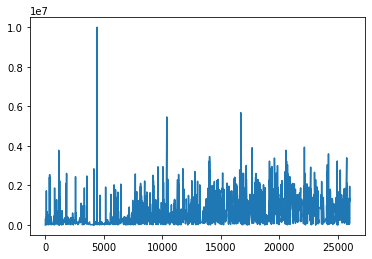

In [24]:
transfer_df["amount"][:2500].plot()

In [25]:
adf_calculation(transfer_df["oldbalanceOrg"][:2500])

Test-Statistic           -1.724659e+01
p-value                   6.060266e-30
Lags Used                 3.000000e+00
Number of observations    2.496000e+03
critical_value (1%)      -3.432973e+00
critical_value (5%)      -2.862699e+00
critical_value (10%)     -2.567387e+00
dtype: float64


<AxesSubplot:>

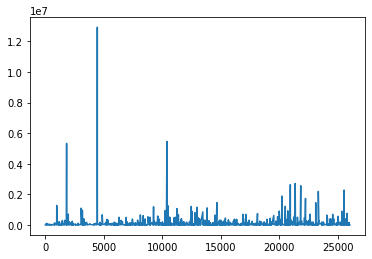

In [26]:
transfer_df["oldbalanceOrg"][:2500].plot()

In [27]:
adf_calculation(transfer_df["newbalanceDest"][:1500])

Test-Statistic           -1.444229e+01
p-value                   7.325644e-27
Lags Used                 3.000000e+00
Number of observations    1.496000e+03
critical_value (1%)      -3.434729e+00
critical_value (5%)      -2.863474e+00
critical_value (10%)     -2.567800e+00
dtype: float64


<AxesSubplot:>

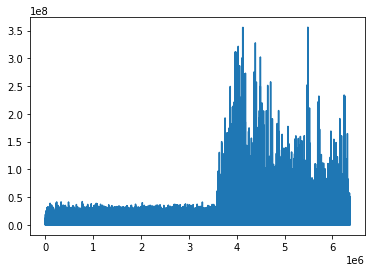

In [28]:
transfer_df["newbalanceDest"].plot()

In [29]:
adf_calculation(transfer_df["step"][:10000])

Test-Statistic              -5.139107
p-value                      0.000012
Lags Used                   35.000000
Number of observations    9964.000000
critical_value (1%)         -3.431006
critical_value (5%)         -2.861830
critical_value (10%)        -2.566924
dtype: float64


<AxesSubplot:>

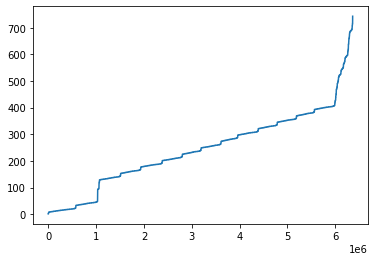

In [30]:
transfer_df["step"].plot()